# 💡 STRATEGY

Go To Kelly_game folder for additional information  

[Guide backtesting](https://greyhoundanalytics.com/blog/backtestingpy-a-complete-quickstart-guide/)

# Install

In [45]:
# import library
from backtesting import Backtest
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sys

sys.path.insert(0, 'C:/Users/Salim Hmidi/Documents/ALGO/Kelly_RM/')

import src.data as data

In [46]:
# import strategy
from src.strategy import RsiOscillator

# Variable

In [47]:

date_debut = '2018-01-01'
date_fin = '2021-01-01'

sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

tickers = np.array(sp500[0]['Symbol'])

#tickers ='AAL'

strat = [RsiOscillator]


df_training=[]
df_unseen =[]
tickers[9]

'AES'

## Load the prices

In [48]:


#Get the list of symbols
historical=[]
for i in range(10):
    
    data_downloaded = await data.get_historical_price_full_crypto(tickers[i])
    historical.append(data_downloaded['historical'])




## Preprocess the data used in the strategy

In [49]:
# Créez une liste vide pour stocker les DataFrames nettoyés avec les tickers
cleaned_data_with_tickers = []

# Parcourez chaque DataFrame dans la liste 'historical'
for ticker, df in zip(tickers[:len(historical)], historical):
    # Créez un DataFrame à partir des données historiques actuelles
    data = pd.DataFrame(df)

    # Mettez la première lettre des noms de colonnes en majuscule
    data.columns = [x.title() for x in data.columns]

    # Supprimez les colonnes non nécessaires
    data.drop(['Adjclose', 'Unadjustedvolume', 'Change', 'Changepercent', 'Vwap', 'Label', 'Changeovertime'], axis=1, inplace=True)

    # Convertissez la colonne 'Date' en format datetime
    data['Date'] = pd.to_datetime(data['Date'])

    # Définissez la colonne 'Date' comme index
    data.set_index('Date', inplace=True)

    # Inversez l'ordre du DataFrame
    data = data.iloc[::-1]

    # Ajoutez une colonne 'Ticker' avec le ticker actuel
    data['Ticker'] = ticker

    # Ajoutez le DataFrame nettoyé à la liste 'cleaned_data_with_tickers'
    cleaned_data_with_tickers.append(data)

# 'cleaned_data_with_tickers' contient mainten




# Divide Your Data into Two Sets

- **Training Data**: This set is used for training the model and learning the underlying patterns in the data.

- **Unseen Data**: This set, also known as the test or validation data, is held out from the training process.


In [55]:
for df in cleaned_data_with_tickers:
    # Your code for each DataFrame here
    split_date = pd.to_datetime(df.index[0]) + pd.DateOffset(years=3)
    df_training.append(df[df.index < split_date])
    df_unseen.append(df[df.index >= split_date])
    

print(df_unseen)

[              Open    High      Low   Close   Volume Ticker
Date                                                       
2021-10-08  177.57  178.10  176.780  176.95  2469500    MMM
2021-10-11  178.02  178.60  176.200  176.28  2691100    MMM
2021-10-12  176.30  176.89  175.130  175.53  2155900    MMM
2021-10-13  175.61  178.40  175.040  177.17  2030500    MMM
2021-10-14  178.00  180.40  177.950  180.32  2279200    MMM
...            ...     ...      ...     ...      ...    ...
2023-09-29   94.00   94.34   93.350   93.62  3044072    MMM
2023-10-02   92.65   92.83   89.310   90.22  8213621    MMM
2023-10-03   89.75   89.94   88.155   88.79  5375110    MMM
2023-10-04   88.60   88.86   87.310   88.02  6521346    MMM
2023-10-05   88.00   88.24   86.550   87.83  4859282    MMM

[501 rows x 6 columns],              Open     High     Low  Close   Volume Ticker
Date                                                     
2021-10-08  64.60  65.0500  63.930  64.23  1240245    AOS
2021-10-11  64.29  6

# Training and Optimizing Backtest Parameters

1. Define the parameter space by listing the variables to optimize, such as indicators or thresholds, along with their potential values.

2. Conduct backtests using different parameter combinations and evaluate performance using metrics like total return, Sharpe ratio, maximum drawdown, and win rate.

3. Perform parameter optimization by identifying the parameter values that yield the best results using techniques like grid search or genetic algorithms.


In [56]:
heatmaps = []


for data in df_training:
        bt = Backtest(data, strat[0], cash=10_000, commission=.002)
        #bt = Backtest(df_trainnig, strat[0], cash=10_000, commission=.002)
        stats, heatmap = bt.optimize(
                upper_bound = range(35,85,5),
                lower_bound = range(15,60,5),
                rsi_window = range(10,30,5),
                maximize='Equity Final [$]',
                return_heatmap=True)

        # choose your colormaps from here
        # https://matplotlib.org/stable/tutorials/colors/colormaps.html

        hm = heatmap.groupby(["upper_bound","lower_bound"]).mean().unstack()

        heatmaps.append(heatmap)  # Append each heatmap to the list



c:\Users\Salim Hmidi\ANAconda\lib\site-packages\backtesting\backtesting.py:1488: UserWarning: Searching for best of 360 configurations.
  output = _optimize_grid()


  0%|          | 0/12 [00:00<?, ?it/s]

c:\Users\Salim Hmidi\ANAconda\lib\site-packages\backtesting\backtesting.py:1488: UserWarning: Searching for best of 360 configurations.
  output = _optimize_grid()


  0%|          | 0/12 [00:00<?, ?it/s]

c:\Users\Salim Hmidi\ANAconda\lib\site-packages\backtesting\backtesting.py:1488: UserWarning: Searching for best of 360 configurations.
  output = _optimize_grid()


  0%|          | 0/12 [00:00<?, ?it/s]

KeyboardInterrupt: 

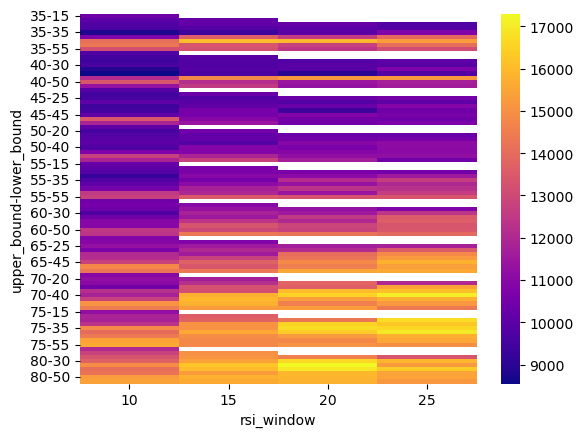

In [ ]:

combined_heatmap = pd.concat(heatmaps, axis=0)

# Step 2: Group and aggregate the data (you can choose your aggregation method, e.g., mean)
agg_heatmap = combined_heatmap.groupby(["upper_bound", "lower_bound", "rsi_window"]).mean().unstack()

# Step 3: Create a heatmap from the aggregated data
sns.heatmap(agg_heatmap, cmap="plasma")
plt.show()



# Filtering Tickers with Inconsistent Results


1. Set a consistency threshold for each metric.

2. Filter out tickers that fail to meet the consistency threshold.

3. Review and refine the remaining tickers based on additional criteria or preferences.


In [ ]:

bt.plot()
print(stats['_trades'].to_string())

   Size  EntryBar  ExitBar  EntryPrice  ExitPrice          PnL  ReturnPct  EntryTime   ExitTime Duration
0   768       364      577    13.01598      27.27  10947.08736   1.095117 2020-03-13 2021-01-15 308 days


# Comparing with Unseen Data


1. Compare strategy performance on the test set with backtest results.

2. Analyze deviations and identify contributing factors.(COVID 19)

3. Filter inconsistent Results



# Estimating Odds of Win, Loss, and Gain













# Kelly Criterion

The Kelly Criterion is a risk management strategy used to determine the optimal capital allocation. Here's a simplified guide:

1. Calculate the Kelly Criterion formula:
   f* = (p * b - q) / b

2. Estimate the probabilities of winning (p) and the net odds received upon winning (b).

3. Calculate the optimal allocation using the formula.

4. Assess risk and adjust the allocation if necessary.

5. Monitor and update allocations based on performance and changing conditions.

Note: Consider other factors and seek professional advice for a comprehensive understanding.



In [ ]:
win_probability= 0.5
win_size=1.3
loss_size=1.2
if win_probability == 1.0:
        kelly_fraction = 1
elif win_probability == 0.0:
        kelly_fraction = 0
else:
    p = win_probability
    q = 1 - p
    b = win_size / loss_size
    kelly_fraction = (p * b - q) / b
kelly_fraction

0.038461538461538526

# Aproximate error 